In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn.metrics as metrics
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

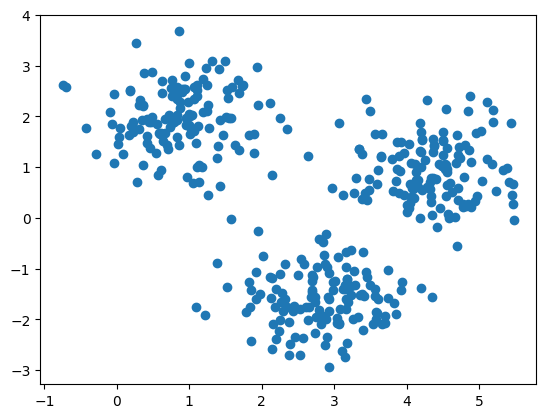

In [58]:
data = pd.read_csv('A2Q3.csv')
data = data.values
X = data[:,0]
Y = data[:,1]
# #normalizing the data
# X = (X - np.mean(X))/np.std(X)
# Y = (Y - np.mean(Y))/np.std(Y)
plt.scatter(X,Y)

In [83]:
class GMM():
    def __init__(self,X,K,iterations):
        self.X = X
        self.K = K
        self.iterations = iterations
        self.N = len(X)
        self.dim = X.shape[1]
        chosen = np.random.choice(self.N,self.K,replace = False)
        
        self.mu = X[chosen]
        # self.mu = np.random.uniform(low = np.min(X),high = np.max(X),size = (K,self.dim))
        self.pi = np.ones(K)/K
        self.sigma = np.full((K,self.dim,self.dim),np.cov(X.T))
        # self.sigma = np.random.rand(K,self.dim,self.dim)
        self.gamma = np.zeros((self.N,self.K))
        self.LLs = []
        self.initial_mu = self.mu
        self.initial_sigma = self.sigma
    
    def fit(self):
        for i in range(self.iterations):
            self.E_step()
            self.M_step()
            cur_LL = self.log_likelihood()
            self.LLs.append(cur_LL)
            # print("Log Likelihood after ",i+1," iterations: ",cur_LL)

    def predict(self):
        y_out = [0.0 for i in range(self.N)]
        for i in range(self.N):
            y_out[i] = np.argmax(self.gamma[i])
        return  y_out

    def E_step(self):
        for i in range(self.N):
            for j in range(self.K):
                self.gamma[i,j] = self.pi[j]*self.gaussian(self.X[i],self.mu[j],self.sigma[j])
            self.gamma[i] /= np.sum(self.gamma[i])
    
    def M_step(self):
        for j in range(self.K):
            sum_gamma = np.sum(self.gamma[:,j])
            self.mu[j] = np.sum(self.gamma[:,j].reshape(-1,1)*self.X,axis = 0)/sum_gamma
            self.pi[j] = sum_gamma/self.N
            self.sigma[j] = np.zeros((self.dim,self.dim))
            for i in range(self.N):
                self.sigma[j] += self.gamma[i,j]*np.outer(self.X[i]-self.mu[j],self.X[i]-self.mu[j])
            self.sigma[j] /= sum_gamma

    def gaussian(self,x,mu,sigma):
        # return multivariate_normal(mu,sigma).pdf(x)
        return np.exp(-0.5*np.dot(np.dot((x-mu).T,np.linalg.inv(sigma)),(x-mu)))/np.sqrt(np.linalg.det(sigma)*2*np.pi)
        
    
    def log_likelihood(self):
        LL = 0
        for i in range(self.N):
            temp = 0
            for j in range(self.K):
                temp += self.pi[j]*self.gaussian(self.X[i],self.mu[j],self.sigma[j])
            LL += np.log(temp)
        return(LL)
    
    


In [183]:
def plot_scatter(data,y_out):
    color_list = ['red', 'green', 'blue', 'yellow', 'cyan', 'magenta', 'black', 'orange', 'purple', 'brown']
    colors = [None for i in range(len(y_out))]
    for i in range(len(y_out)):
        colors[i] = color_list[y_out[i]]
        
    plt.scatter(data[:, 0], data[:, 1], c=colors, s=20, edgecolor='k')
    plt.title("K = "+str(len(np.unique(y_out))))

    plt.savefig("q3p21"+str(len(np.unique(y_out)))+".png")
    plt.show()

In [185]:
def plot_contours(data,y_out,means,covs):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),np.linspace(y_min, y_max, 400))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    K = len(means)
    color_list = ['red', 'green', 'blue', 'yellow', 'cyan', 'magenta', 'black', 'orange', 'purple', 'brown']
    colors = [None for i in range(len(y_out))]
    for i in range(len(y_out)):
        colors[i] = color_list[y_out[i]]
        
    plt.scatter(data[:, 0], data[:, 1], c=colors, s=20, edgecolor='k')
    # multivariate_normal.pdf(X_grid, mean=means[0], cov=covs[0])
    for i in range(K):
        Z = multivariate_normal.pdf(X_grid, mean=means[i], cov=covs[i])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z,colors = color_list[i])
    plt.title("K = "+str(len(np.unique(y_out))))
    plt.savefig("q3p22"+str(len(np.unique(y_out)))+".png")
    plt.show()
    



In [165]:
model = [None for i in range(9)]
y_out = [None for i in range(9)]
for i in range(9):
    model[i] = GMM(data,i+2,100)
    model[i].fit()



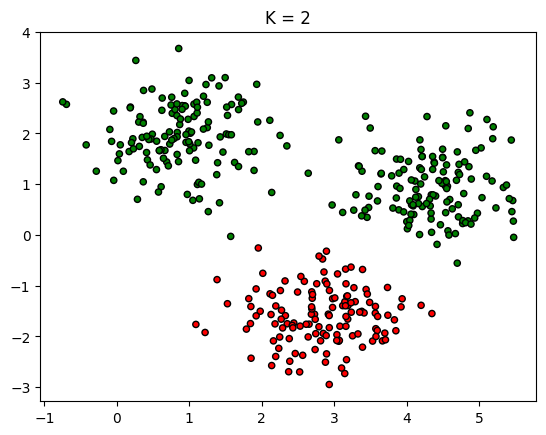

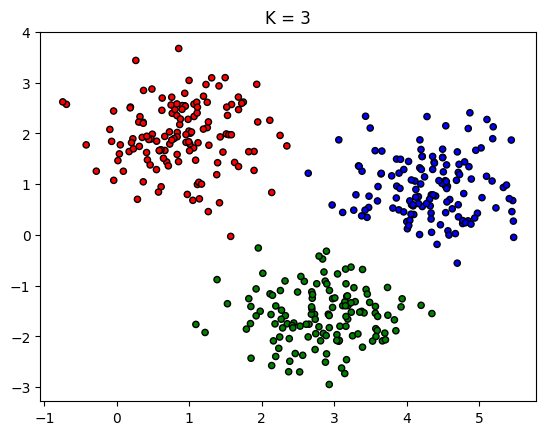

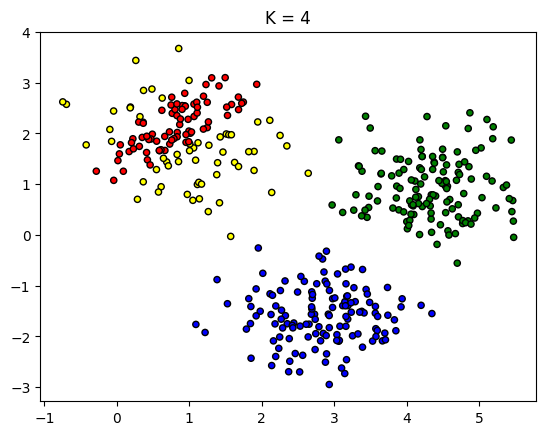

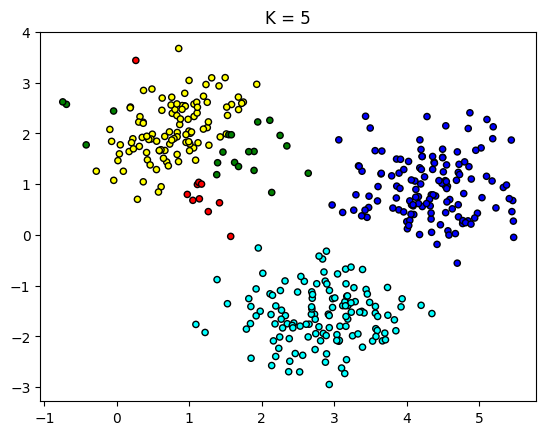

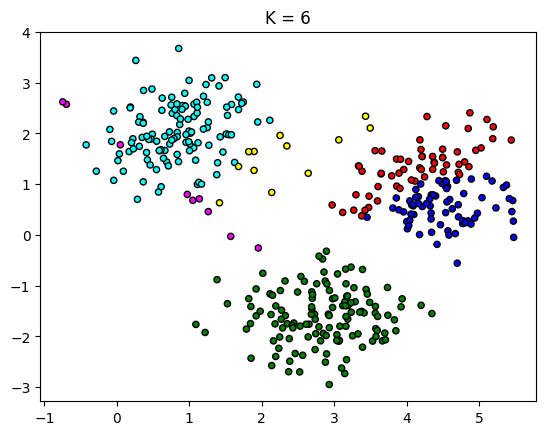

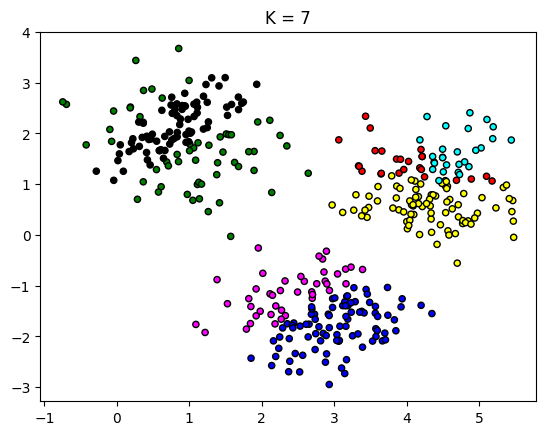

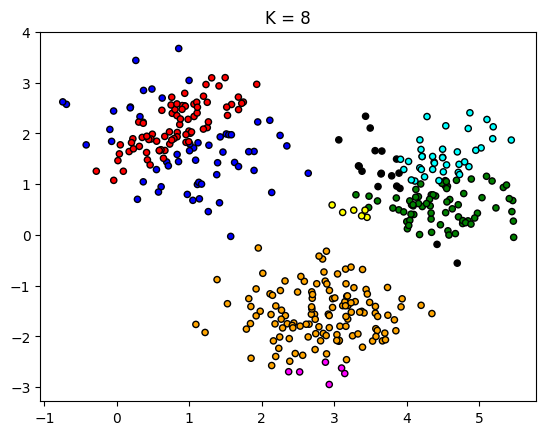

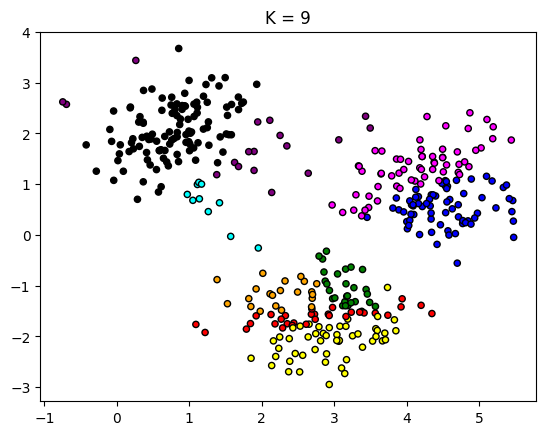

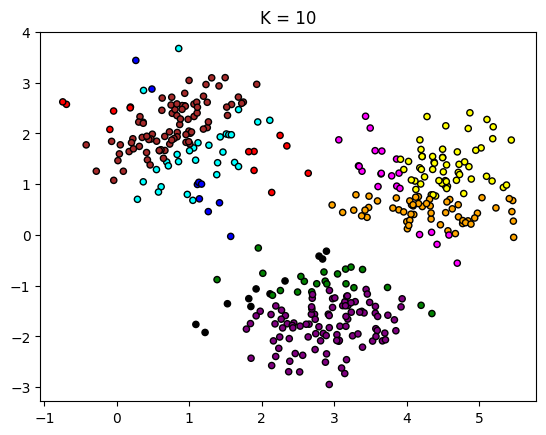

In [184]:
for i in range(9):
    y_out[i] = model[i].predict()
    plot_scatter(data,y_out[i])

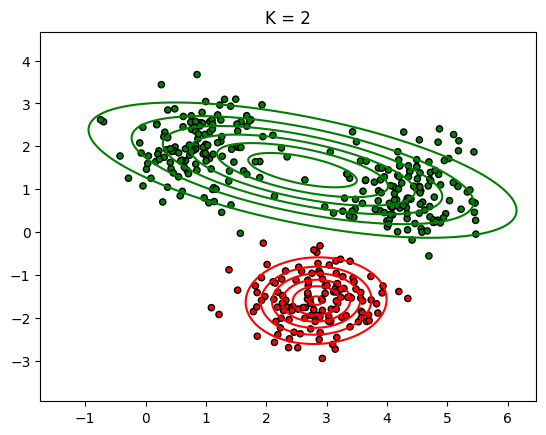

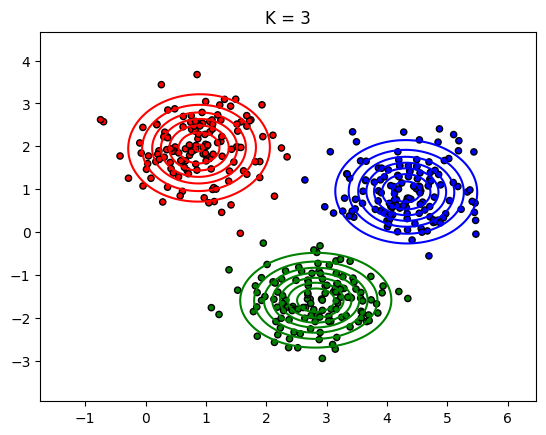

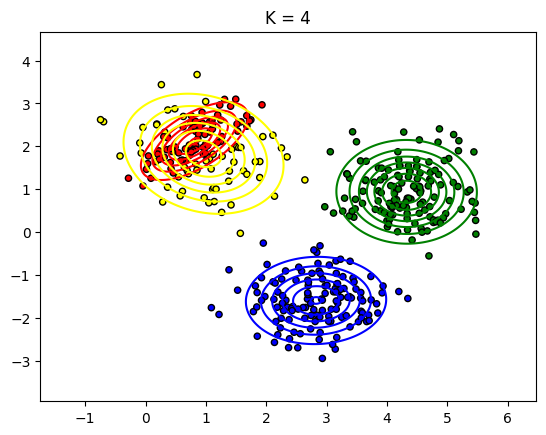

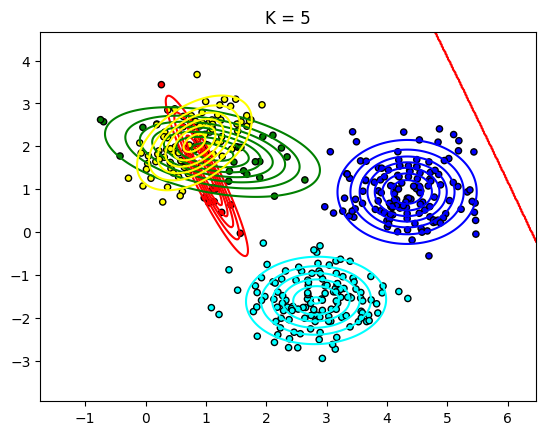

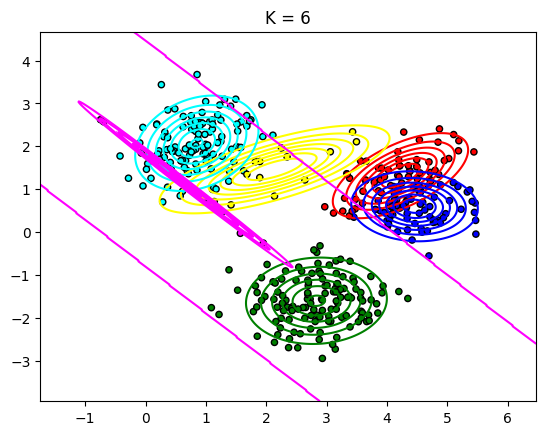

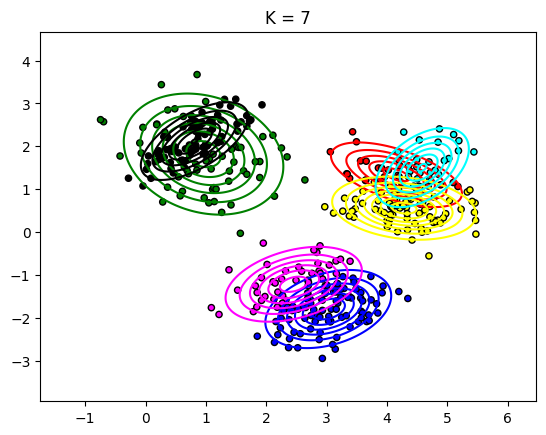

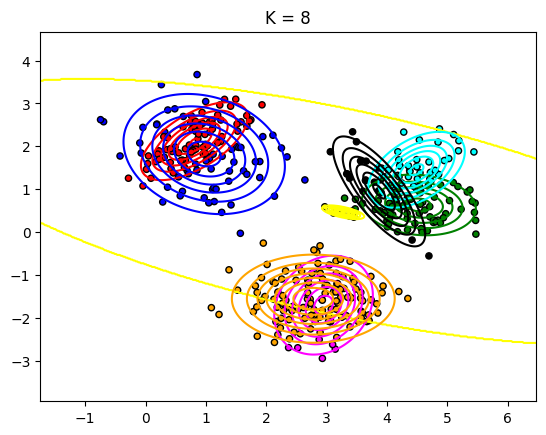

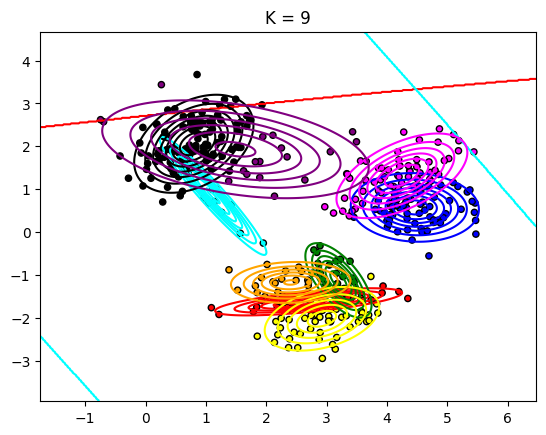

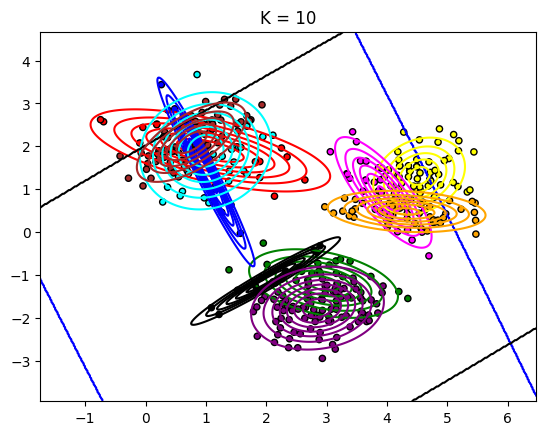

In [186]:
for i in range(9):
    y_out[i] = model[i].predict()
    # print(y_out[i])
    # plot_scatter(data,y_out[i])
    plot_contours(data,y_out[i],model[i].mu,model[i].sigma)

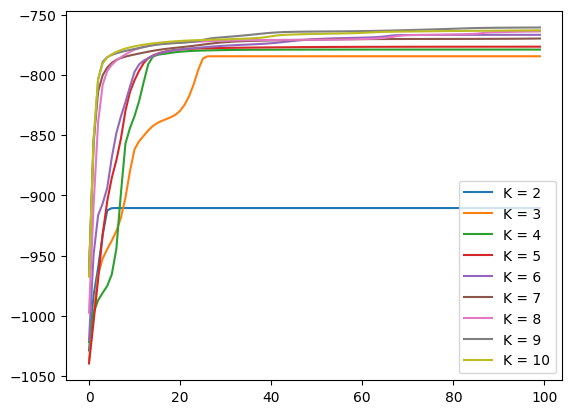

In [187]:
for i in range(9):
    plt.plot(model[i].LLs)
    plt.legend(['K = 2','K = 3','K = 4','K = 5','K = 6','K = 7','K = 8','K = 9','K = 10'])
    

In [135]:
def get_silhouette_score(data,y_out):
    sh = [metrics.silhouette_score(data,y_out[i]) for i in range(5)]
    return sh

In [120]:
# def get_davies_bouldin_score(data,y_out):
#     return metrics.davies_bouldin_score(data,y_out)

In [126]:
# def get_calinski_harabasz_score(data,y_out):
#     return metrics.calinski_harabasz_score(data,y_out)

In [137]:
def BIC(data):
    models = [GaussianMixture(i+2, max_iter=1000).fit(data) for i in range(5)]
    bics = [m.bic(data) for m in models]
    aics = [m.aic(data) for m in models]
    return bics,aics

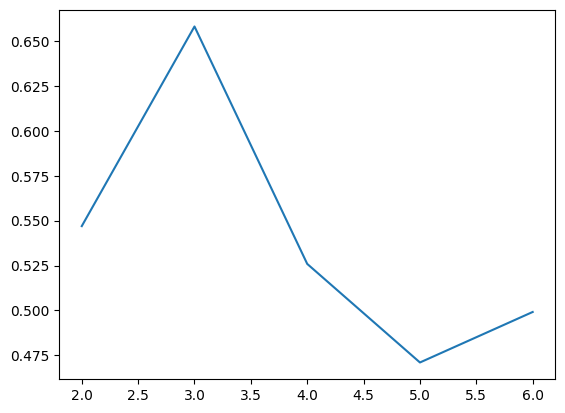

In [140]:
k_range = np.arange(2,7)
shs = get_silhouette_score(data,y_out)
plt.plot(k_range,shs)

In [138]:
bics,aics = BIC(data)

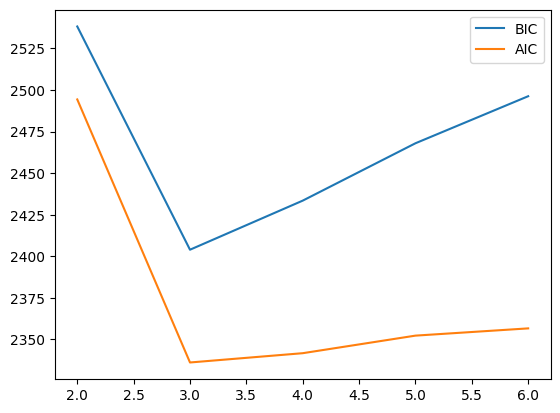

In [145]:

plt.plot(k_range, bics)
plt.plot(k_range, aics)
plt.legend(['BIC', 'AIC'])